# Making a Neural Network using only Numpy

### About
This **Neural Network** is made completely using `Numpy`.  
Some specifications:

* This model takes in **2** inputs.
* It gives **1** output as a "0" or "1".
* We can set the training iterations and the training dataset while calling the `train()` function.


### How this works
This model uses a `sigmoid`, `sigmoid_p` and `cost` funtion to get the cost and set the weights and biases according to it in order to reduce the cost and optimise the Neural Network to get the best output.

### Installing the dependencies

We'll need `numpy` for all the maths and `matplotlib` for data visualization.

In [7]:
from matplotlib import pyplot as plt
import numpy as np

### Getting the dataset

This dataset includes the **lenght** and **breadth** as the inputs and the **type**  as the output.  
This dataset also has a testing dataset for testing the trained model.

In [8]:
# each point is length, width, type (0, 1)
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

test_data = [4.5, 1, 1]

### Visualizing the dataset

Now we'll visualize the dataset using `matplotlib`.

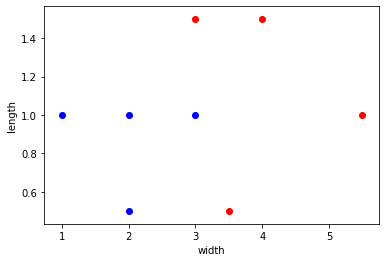

In [9]:
# scatter plot them
def vis_data():
    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)
    plt.ylabel("length")
    plt.xlabel("width")
vis_data()

### Defining the Activation Functions
Here we will define the activation functions as `sigmoid()` and `sigmoid_p()` to get fix the weights and baises in order to improve the neural network

In [10]:
# activation function
# sigmoid function > f(x)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# derivative of the sigmoid function > f'(x)
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

### Visualize the activation functions

Here we'll visualize our `sigmoid` and `sigmoid_p` activation functions

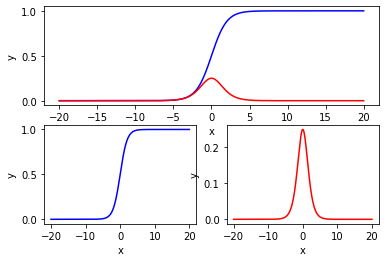

In [58]:
X = np.linspace(-20, 20, 1000)

# all ctivation functions
plt.subplot(2, 1, 1)
plt.ylabel("y")
plt.xlabel("x")
plt.plot(X, sigmoid(X), color='blue',)
plt.plot(X, sigmoid_p(X), color='red',)
# plot sigmoid
plt.subplot(2, 2, 3) 
plt.ylabel("y")
plt.xlabel("x")
plt.plot(X, sigmoid(X), color='blue',)
# plot derivative of sigmoid
plt.subplot(2, 2, 4)
plt.ylabel("y")
plt.xlabel("x")
plt.plot(X, sigmoid_p(X), color='red',)
plt.show()

### Training the model
Now we'll train our model on the dataset in order to get the best predictions.

In [12]:
# training function
def train(data, iterations):
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down   
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
# Train the model
costs, w1, w2, b = train(data, 100000000)

##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########
##########10000000 iterations completed#########


### Visualizing the costs

No we'll visualize the costs from the training function.

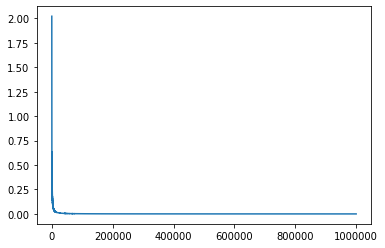

In [59]:
# visualize the costs
fig = plt.plot(costs)

### Making predictions

Now we'll make the predictions from the test_data and get the error
> The output approches `1` as the number of iterations increases. After `100000000` iterations the output becomes `1.0` and cost and error reaches `0`.

In [14]:
z = w1 * test_data[0] + w2 * test_data[1] + b
pred = sigmoid(z)
real = test_data[2]
error = real - pred

print('pred: ', pred)
print('real: ', real)
print('error: ', error)

pred:  1.0
real:  1
error:  0.0


### Final visualization of data

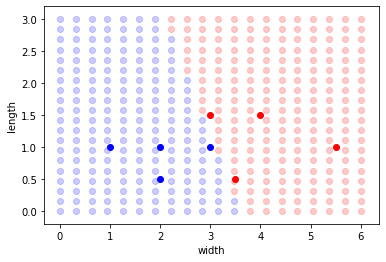

In [15]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()